In [1]:
import warnings
warnings.filterwarnings(action='ignore')

import pandas as pd
import os
import re
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import OneHotEncoder
from facial import CNNmodel,Vgg19,Resnet,Xceptionmodel,Conv_Lstm
from keras.models import load_model
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


# Facial Dataset 

### Reading data and getting data insights

In [8]:
data = pd.read_csv('fer2013.csv')
data.drop('Usage',axis=1,inplace=True)

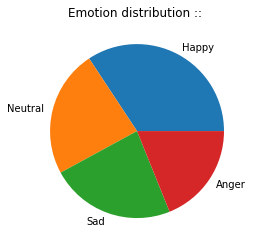

In [9]:
data.emotion = data.emotion.map({0:'Anger', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'})
data = data[(data.emotion!='Surprise')&(data.emotion!='Disgust')&(data.emotion!='Fear')]
data.reset_index(inplace=True)

plt.title('Emotion distribution :: ')
plt.pie(data.emotion.value_counts(),labels =data.emotion.value_counts().index )
plt.show()

In [10]:
if os.path.isdir('data_face') == False:
    os.mkdir('data_face')
root='data_face'

In [11]:
labels = []
images = []
for i in range(len(data)):
    labels.append(data.emotion[i])
    images.append(np.array([np.int(pixel) for pixel in data.pixels[i].split()]).reshape(48,48))

In [12]:
i=0
for img,directory in zip(images,labels):
        directory = root+'/'+directory
        directory=re.split('/',directory)
        name = str(i)+'.png'
        i+=1
        if os.path.isdir('{}/{}'.format(directory[0],directory[1])):
            im = Image.fromarray(img.reshape(48,48))
            im = im.convert('RGB')
            im.save("{}/{}/{}".format(directory[0],directory[1],name))
        else :
            os.mkdir('{}/{}'.format(directory[0],directory[1]))
            im = Image.fromarray(img.reshape(48,48))
            im = im.convert('RGB')
            im.save("{}/{}/{}".format(directory[0],directory[1],name))

In [69]:
del data,labels,images

# Training Model

In [2]:
model= CNNmodel(data_directory = 'data_face')

Found 20976 images belonging to 4 classes.
Found 5241 images belonging to 4 classes.







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [3]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 44, 44, 64)        1664      
_________________________________________________________________
batch_normalization_1 (Batch (None, 44, 44, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 42, 42, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 42, 42, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 21, 21, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 21, 21, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 128)      

In [4]:
model.train(epoch=50)

[INFO] training network...

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/50
1311/1311 [==============================] - 269s 205ms/step - loss: 1.3935 - acc: 0.3463 - val_loss: 1.3285 - val_acc: 0.3843
Epoch 2/50
1311/1311 [==============================] - 177s 135ms/step - loss: 1.1636 - acc: 0.4706 - val_loss: 1.1762 - val_acc: 0.4596
Epoch 3/50
1311/1311 [==============================] - 182s 139ms/step - loss: 1.0564 - acc: 0.5328 - val_loss: 1.0382 - val_acc: 0.5409
Epoch 4/50
1311/1311 [==============================] - 179s 136ms/step - loss: 0.9952 - acc: 0.5727 - val_loss: 0.9834 - val_acc: 0.5659
Epoch 5/50
1311/1311 [==============================] - 180s 138ms/step - loss: 0.9715 - acc: 0.5847 - val_loss: 1.0185 - val_acc: 0.5840
Epoch 6/50
1311/1311 [==============================] - 182s 139ms/step - loss: 0.9373 - acc: 0.6053 - val_loss: 0.9092 - val_acc: 0.6142
Epoch 7/50
1311/1311 [============================

In [5]:
history_cnn = model.history

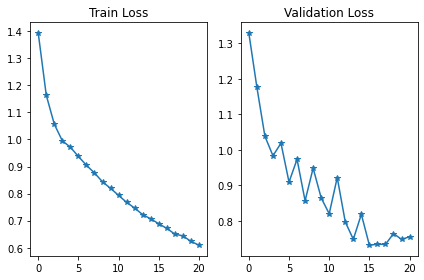

In [6]:
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.title.set_text("Train Loss")
ax1.plot(history_cnn.history['loss'],'*-')

ax2.title.set_text("Validation Loss")
ax2.plot(history_cnn.history['val_loss'],'*-')

fig.tight_layout()
fig.show()

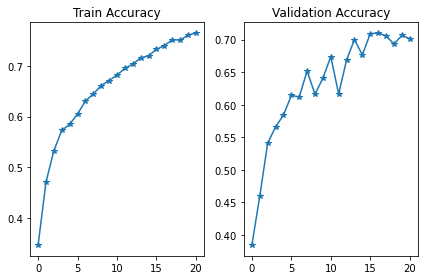

In [7]:
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.title.set_text("Train Accuracy")
ax1.plot(history_cnn.history['acc'],'*-')

ax2.title.set_text("Validation Accuracy")
ax2.plot(history_cnn.history['val_acc'],'*-')

fig.tight_layout()
fig.show()

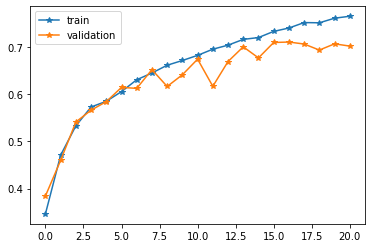

In [8]:
plt.plot(history_cnn.history['acc'],'*-',label="train")
plt.plot(history_cnn.history['val_acc'],'*-',label="validation")
plt.legend()

# VGG 19

In [2]:
model = Vgg19(data_directory="data_face")

Found 20976 images belonging to 4 classes.
Found 5241 images belonging to 4 classes.







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [3]:
model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 48, 48, 1)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        640       
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0     

In [4]:
model.train(epoch=100)


[INFO] training network...
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
1311/1311 [==============================] - 262s 200ms/step - loss: 1.3721 - acc: 0.3426 - val_loss: 1.3637 - val_acc: 0.3429
Epoch 2/100
1311/1311 [==============================] - 256s 195ms/step - loss: 1.3631 - acc: 0.3429 - val_loss: 1.3653 - val_acc: 0.3429
Epoch 3/100
1311/1311 [==============================] - 256s 196ms/step - loss: 1.3626 - acc: 0.3429 - val_loss: 1.3632 - val_acc: 0.3429
Epoch 4/100
1311/1311 [==============================] - 256s 196ms/step - loss: 1.3622 - acc: 0.3429 - val_loss: 1.3629 - val_acc: 0.3429
Epoch 5/100
1311/1311 [==============================] - 257s 196ms/step - loss: 1.3625 - acc: 0.3429 - val_loss: 1.3617 - val_acc: 0.3429
Epoch 00005: early stopping
[INFO] Saving model...
[INFO] Done...


In [5]:
history_vgg = model.history

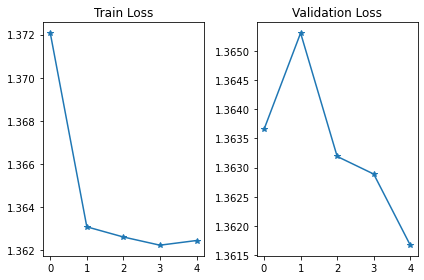

In [6]:
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.title.set_text("Train Loss")
ax1.plot(history_vgg.history['loss'],'*-')

ax2.title.set_text("Validation Loss")
ax2.plot(history_vgg.history['val_loss'],'*-')

fig.tight_layout()
fig.show()

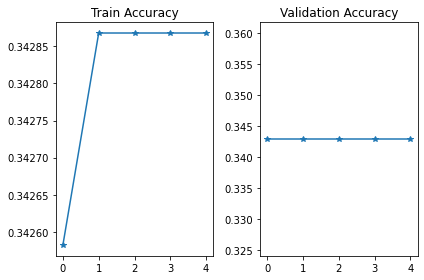

In [7]:
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.title.set_text("Train Accuracy")
ax1.plot(history_vgg.history['acc'],'*-')

ax2.title.set_text("Validation Accuracy")
ax2.plot(history_vgg.history['val_acc'],'*-')

fig.tight_layout()
fig.show()

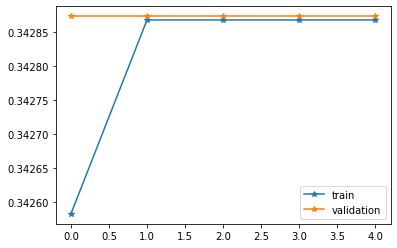

In [8]:
plt.plot(history_vgg.history['acc'],'*-',label="train")
plt.plot(history_vgg.history['val_acc'],'*-',label="validation")
plt.legend()

# ResNet50

In [9]:
model= Resnet(data_directory="data_face")

Found 20976 images belonging to 4 classes.
Found 5241 images belonging to 4 classes.


In [10]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 48, 48, 1)    0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 54, 54, 1)    0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 24, 24, 64)   3200        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 24, 24, 64)   256         conv1[0][0]                      
___________________________________________________________________________________________

In [11]:
model.train(epoch=50)

[INFO] training network...
Epoch 1/50
1311/1311 [==============================] - 295s 225ms/step - loss: 1.5171 - acc: 0.3845 - val_loss: 2.4519 - val_acc: 0.2843
Epoch 2/50
1311/1311 [==============================] - 276s 210ms/step - loss: 1.4985 - acc: 0.4202 - val_loss: 5.5733 - val_acc: 0.3366
Epoch 3/50
1311/1311 [==============================] - 275s 210ms/step - loss: 1.9903 - acc: 0.3198 - val_loss: 1.7345 - val_acc: 0.3255
Epoch 4/50
1311/1311 [==============================] - 279s 212ms/step - loss: 1.4583 - acc: 0.3525 - val_loss: 1.4740 - val_acc: 0.3635
Epoch 5/50
1311/1311 [==============================] - 283s 216ms/step - loss: 1.2736 - acc: 0.4207 - val_loss: 1.3837 - val_acc: 0.4251
Epoch 6/50
1311/1311 [==============================] - 273s 208ms/step - loss: 1.2013 - acc: 0.4551 - val_loss: 1.4171 - val_acc: 0.3452
Epoch 7/50
1311/1311 [==============================] - 275s 210ms/step - loss: 1.1230 - acc: 0.5023 - val_loss: 1.2975 - val_acc: 0.4803
Epoch 8

In [12]:
history_resnet = model.history

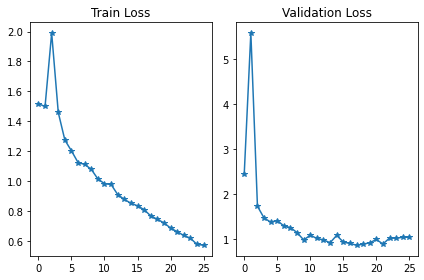

In [13]:
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.title.set_text("Train Loss")
ax1.plot(history_resnet.history['loss'],'*-')

ax2.title.set_text("Validation Loss")
ax2.plot(history_resnet.history['val_loss'],'*-')

fig.tight_layout()
fig.show()

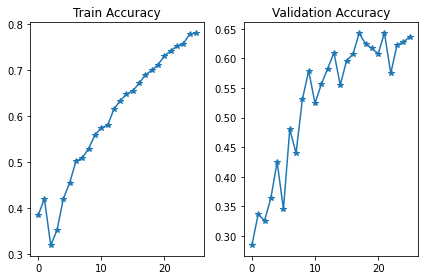

In [14]:
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.title.set_text("Train Accuracy")
ax1.plot(history_resnet.history['acc'],'*-')

ax2.title.set_text("Validation Accuracy")
ax2.plot(history_resnet.history['val_acc'],'*-')

fig.tight_layout()
fig.show()

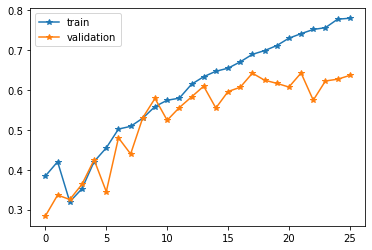

In [15]:
plt.plot(history_resnet.history['acc'],'*-',label="train")
plt.plot(history_resnet.history['val_acc'],'*-',label="validation")
plt.legend()

# Conv - LSTM

In [2]:
oe_enc = OneHotEncoder()

In [3]:
data = pd.read_csv('fer2013.csv')
data.drop('Usage',axis=1,inplace=True)

data.emotion = data.emotion.map({0:'Anger', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'})

In [7]:
data = data[(data.emotion!='Surprise')&(data.emotion!='Disgust')&(data.emotion!='Fear')]
data.reset_index(inplace=True)

In [8]:
labels = []
images = []
for i in range(len(data)):
    labels.append(data.emotion[i])
    images.append(np.array([np.int(pixel) for pixel in data.pixels[i].split()]).reshape(1,48,48,1))

In [9]:
images = np.array(images)
labels = np.array(labels)
labels = oe_enc.fit_transform(labels.reshape(-1,1)).toarray()

X_train,X_test,Y_train,Y_test = train_test_split(images,labels,shuffle=True)

In [ ]:
model = Conv_Lstm()
model.train(X_train,Y_train,X_test,Y_test,epoch=50)

[INFO] training network...
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 19662 samples, validate on 6555 samples
Epoch 1/50
19662/19662 [==============================] - 144s 7ms/step - loss: 1.3631 - acc: 0.3422 - val_loss: 1.3624 - val_acc: 0.3402
Epoch 2/50
19662/19662 [==============================] - 135s 7ms/step - loss: 1.3611 - acc: 0.3436 - val_loss: 1.3627 - val_acc: 0.3404
Epoch 3/50
19662/19662 [==============================] - 135s 7ms/step - loss: 1.3564 - acc: 0.3496 - val_loss: 1.3568 - val_acc: 0.3480
Epoch 4/50
19662/19662 [==============================] - 135s 7ms/step - loss: 1.3581 - acc: 0.3433 - val_loss: 1.3520 - val_acc: 0.3506
Epoch 5/50
19662/19662 [==============================] - 136s 7ms/step - loss: 1.3437 - acc: 0.3524 - val_loss: 1.3678 - val_acc: 0.3390
Epoch 6/50
19662/19662 [==============================] - 139s 7ms/step - loss: 1.3143 - acc: 0.3782 - val_loss: 1.2669 - val_acc: 0.4127
Ep

In [ ]:
history_conv = model.history

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.title.set_text("Train Loss")
ax1.plot(history_conv.history['loss'],'*-')

ax2.title.set_text("Validation Loss")
ax2.plot(history_conv.history['val_loss'],'*-')

fig.tight_layout()
fig.show()

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.title.set_text("Train Accuracy")
ax1.plot(history_conv.history['acc'],'*-')

ax2.title.set_text("Validation Accuracy")
ax2.plot(history_conv.history['val_acc'],'*-')

fig.tight_layout()
fig.show()

In [ ]:
plt.plot(history_conv.history['acc'],'*-',label="train")
plt.plot(history_conv.history['val_acc'],'*-',label="validation")
plt.legend()